In [17]:
# import library numpy untuk manipulasi data
import numpy as np
# import library matplotlib untuk plot grafik
import matplotlib.pyplot as plt
# import library pillow untuk menload image
from PIL import Image

In [18]:
# import image
img = Image.open('lena.jpeg')

(array([1.6200e+02, 2.6100e+02, 5.5500e+02, 5.4900e+02, 5.9100e+02,
        2.7000e+02, 3.3300e+02, 4.4100e+02, 6.2100e+02, 6.5400e+02,
        9.9600e+02, 1.1730e+03, 1.0230e+03, 1.8210e+03, 3.1050e+03,
        4.0470e+03, 4.2720e+03, 4.6080e+03, 4.6020e+03, 4.7100e+03,
        4.9110e+03, 5.0640e+03, 5.2110e+03, 5.0130e+03, 4.2660e+03,
        5.1270e+03, 4.9800e+03, 5.1090e+03, 5.7900e+03, 6.2940e+03,
        6.2760e+03, 6.3810e+03, 7.9290e+03, 7.8960e+03, 6.4590e+03,
        6.8460e+03, 1.0032e+04, 5.4090e+03, 3.9450e+03, 2.2410e+03,
        8.0700e+02, 2.9700e+02, 9.9000e+01, 9.0000e+00, 6.0000e+00,
        6.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([  0.  ,   4.92,   9.84,  14.76,  19.68,  24.6 ,  29.52,  34.44,
         39.36,  44.28,  49.2 ,  54.12,  59.04,  63.96,  68.88,  73.8 ,
         78.72,  83.64,  88.56,  93.48,  98.4 , 103.32, 108.24, 113.16,
        118.08, 123.  , 127.92, 132.84, 137.76, 142.68, 147.6 , 152.52,
        157.44, 162.36, 167.28

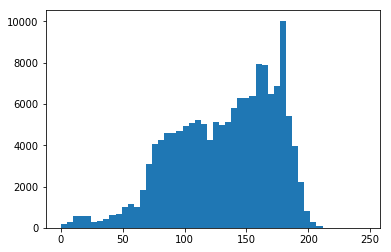

In [19]:
# convert image ke array
img1 = np.asarray(img)
# menjadikan array image menjadi 1 dimensi
flat = img1.flatten()
plt.hist(flat, bins=50)

In [20]:
# fungsi untuk mendapatkan histogram dari data image
def gethist(image, bins):    
    histogram = np.zeros(bins)
    
    for pixel in image:
        histogram[pixel] += 1
    
    return histogram

hist = gethist(flat, 256)

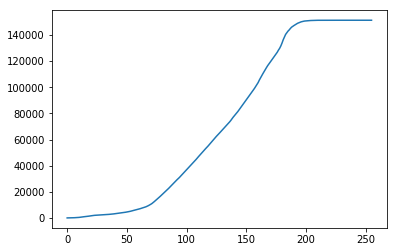

In [21]:
# fungsi untuk mencari cumulative histogram
def cumulative(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

cs = cumulative(hist)
plt.plot(cs)

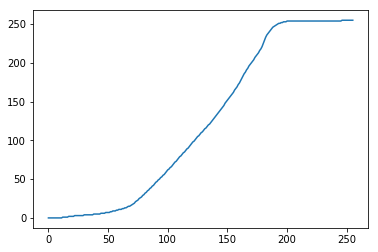

In [22]:
# fungsi normalisasi agar data tidak terlalu besar
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()
cs = nj / N
# mengembalikan tipe data ke uint8 karena dalam image tidak berlaku float
cs = cs.astype('uint8')

plt.plot(cs)

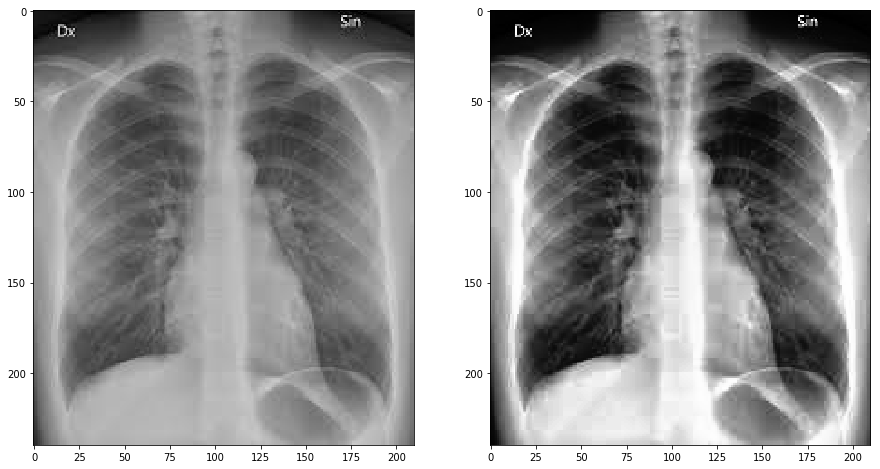

In [23]:
# memindahkan variabel cs untuk tiap indek ke variable img_new
img_new = cs[flat]
# mengembalikan ukuran image semula, yang sebelumnya diflatten
img_new = np.reshape(img_new, img1.shape)

# setup plot
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)